In this project, we'll see how linear models work if there is imbalanced dataset. We'll observe how hyperplane changes as the learning rate changes. Will apply SVM and Logistic Regression algorithms with different regularization strengths[0.001,1,100]

In [1]:
# required imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC

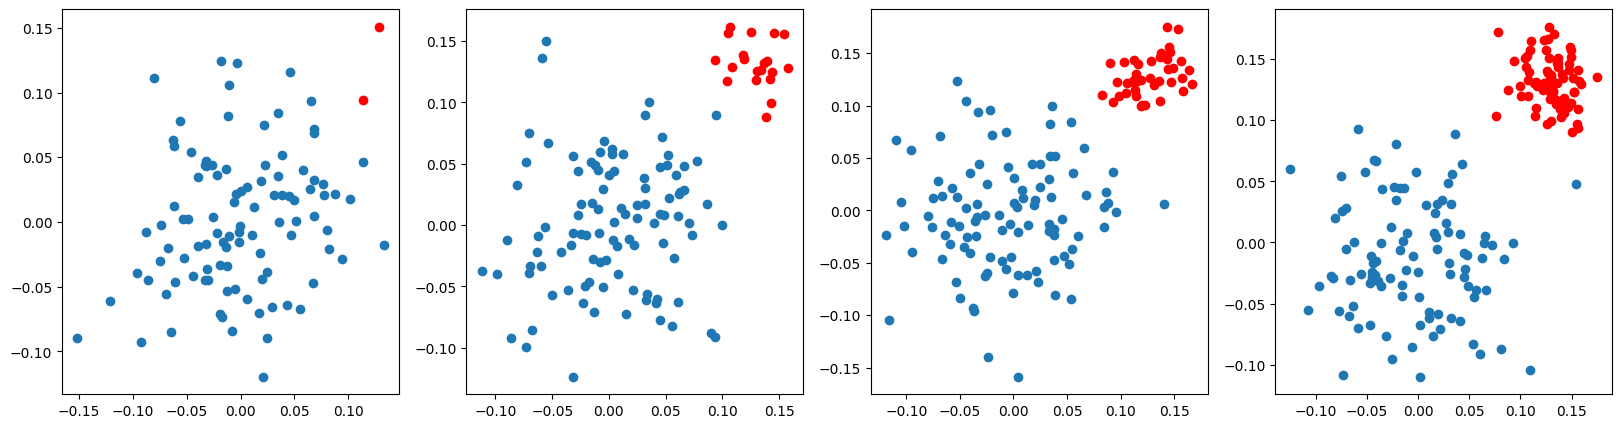

In [3]:
# creating 4 imbalanced datasets with ratios between positive and negative samples as 100:2, 100:20, 100:40, 100:80
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for idx,i in enumerate(ratios):
    plt.subplot(1, 4, idx+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')

# plotting 4 linearly separable datasets
plt.show()

<h2>Support Vector Machines</h2>

In [43]:
# function to draw a hyperplane in the plots
def draw_line(coef,intercept, mi, ma):
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

In [44]:
# regularizer(C) values
regularizers = [0.001, 1, 100]

# four datasets with different ratios of points(positive points:negative points)
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

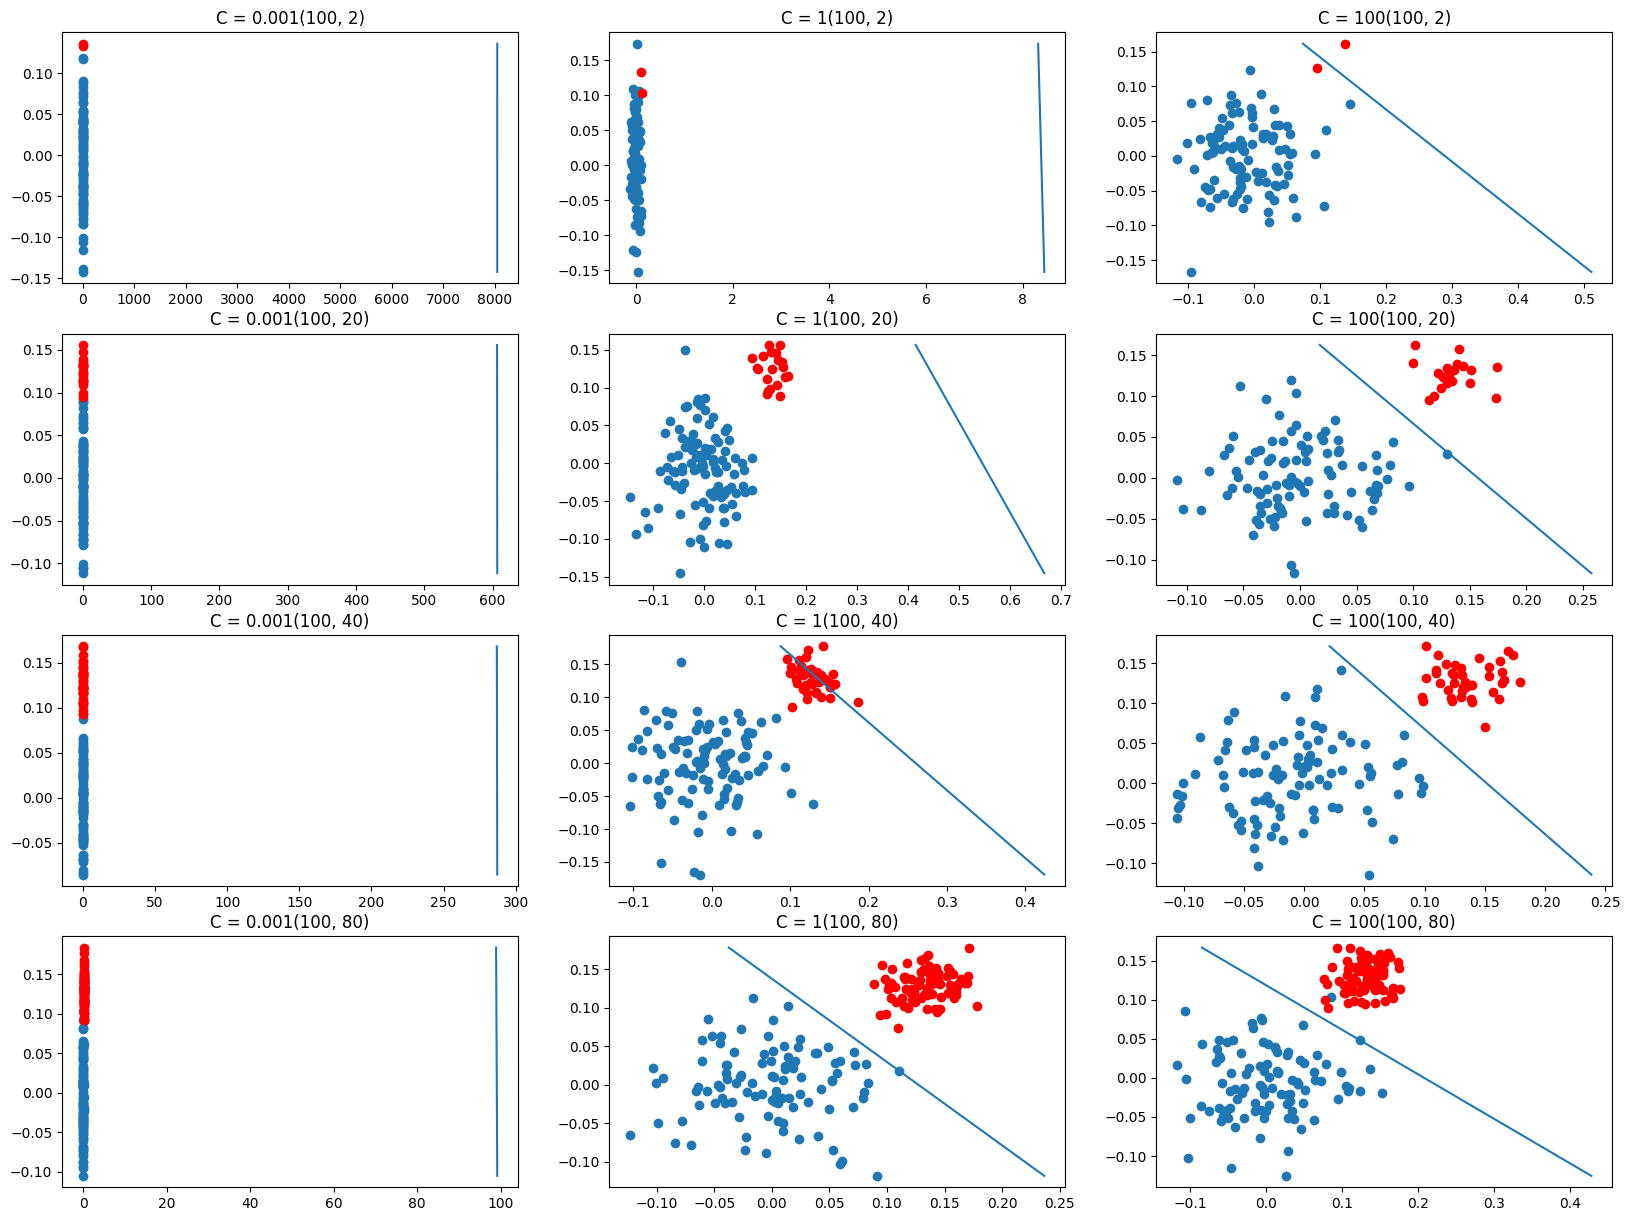

In [46]:
plt.figure(figsize=(20,15))

# initializing number of subplots to one(number of subplots will increment in the for loop till 12 subplots)
fig_count = 1

for i in ratios:
  # looping through the list of regularizers(indices) i.e. looping through 0.001,1,100

  for k in range(0,3):

    # C is regularizer which is (1/λ) and we are considering linear kernel(linear, as the datasets are linearly separable)
    clf = SVC(C=regularizers[k], kernel='linear')

    plt.subplot(4, 3, fig_count)
    # incrementing the subplot count(till 12)
    fig_count += 1

    # generating random samples(postitve and negative) from normal(gaussian) distribution
    # positive random samples with mean = 0 and standard deviation = 0.05
    X_p=np.random.normal(0,0.05,size=(i[0],2)) 
    # negative random samples with mean = 0.13 and standard deviation = 0.02
    X_n=np.random.normal(0.13,0.02,size=(i[1],2)) 

    # reshape(-1,1) will give an array with only one column # reference - https://discuss.codingblocks.com/t/what-is-meaning-of-reshape-1-1/14830
    # array of ones(1)/positive labels equal to number of positive points
    y_p=np.array([1]*i[0]).reshape(-1,1) 
    # array of zeros(0)/negative labels equal to number of negative points
    y_n=np.array([0]*i[1]).reshape(-1,1)

    # vstack() stacks arrays vertically(row wise)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))

    #train the svm classifier
    clf.fit(X, y)

    # scatter() is used to plot dots in the plots for the data points of the dataset
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')

    # titles for every subplot(mentioning regularizer and dataset)
    plt.title('C = '+str(regularizers[k])+str(i))

    # function draw_line() called, to plot the hyperplane in every subplot
    draw_line(coef=clf.coef_[0], intercept=clf.intercept_[0], mi=min(X[:,1]), ma=max(X[:,1]))

plt.show()

### **Observation for SVM :**

1.   **When C = 0.001** <br>
As the regularization parameter(C) is very small(0.001), the hyperplane is unable to separate the positive points from negative points. The hyperplane observed is far away from the data points. The classifier fails to classify the points for balanced dataset as well as imbalanced dataset.
2.   **When C = 1** <br>
The hyperplane is unable to separate the positive and negative points of highly imbalanced dataset. But for dataset (100,80), the hyperplane is able to classify the points(positive and negative) with some misclassified points as well. 

1.   **When C = 100** <br>
The hyperplane is able to classify the positive and negative points for all the datasets(very little missclassified points). This improvement in classification is due to C = 100. Even for the highly imbalanced dataset, SVC is able to classify the points.



<h2>Logistic Regression</h2>

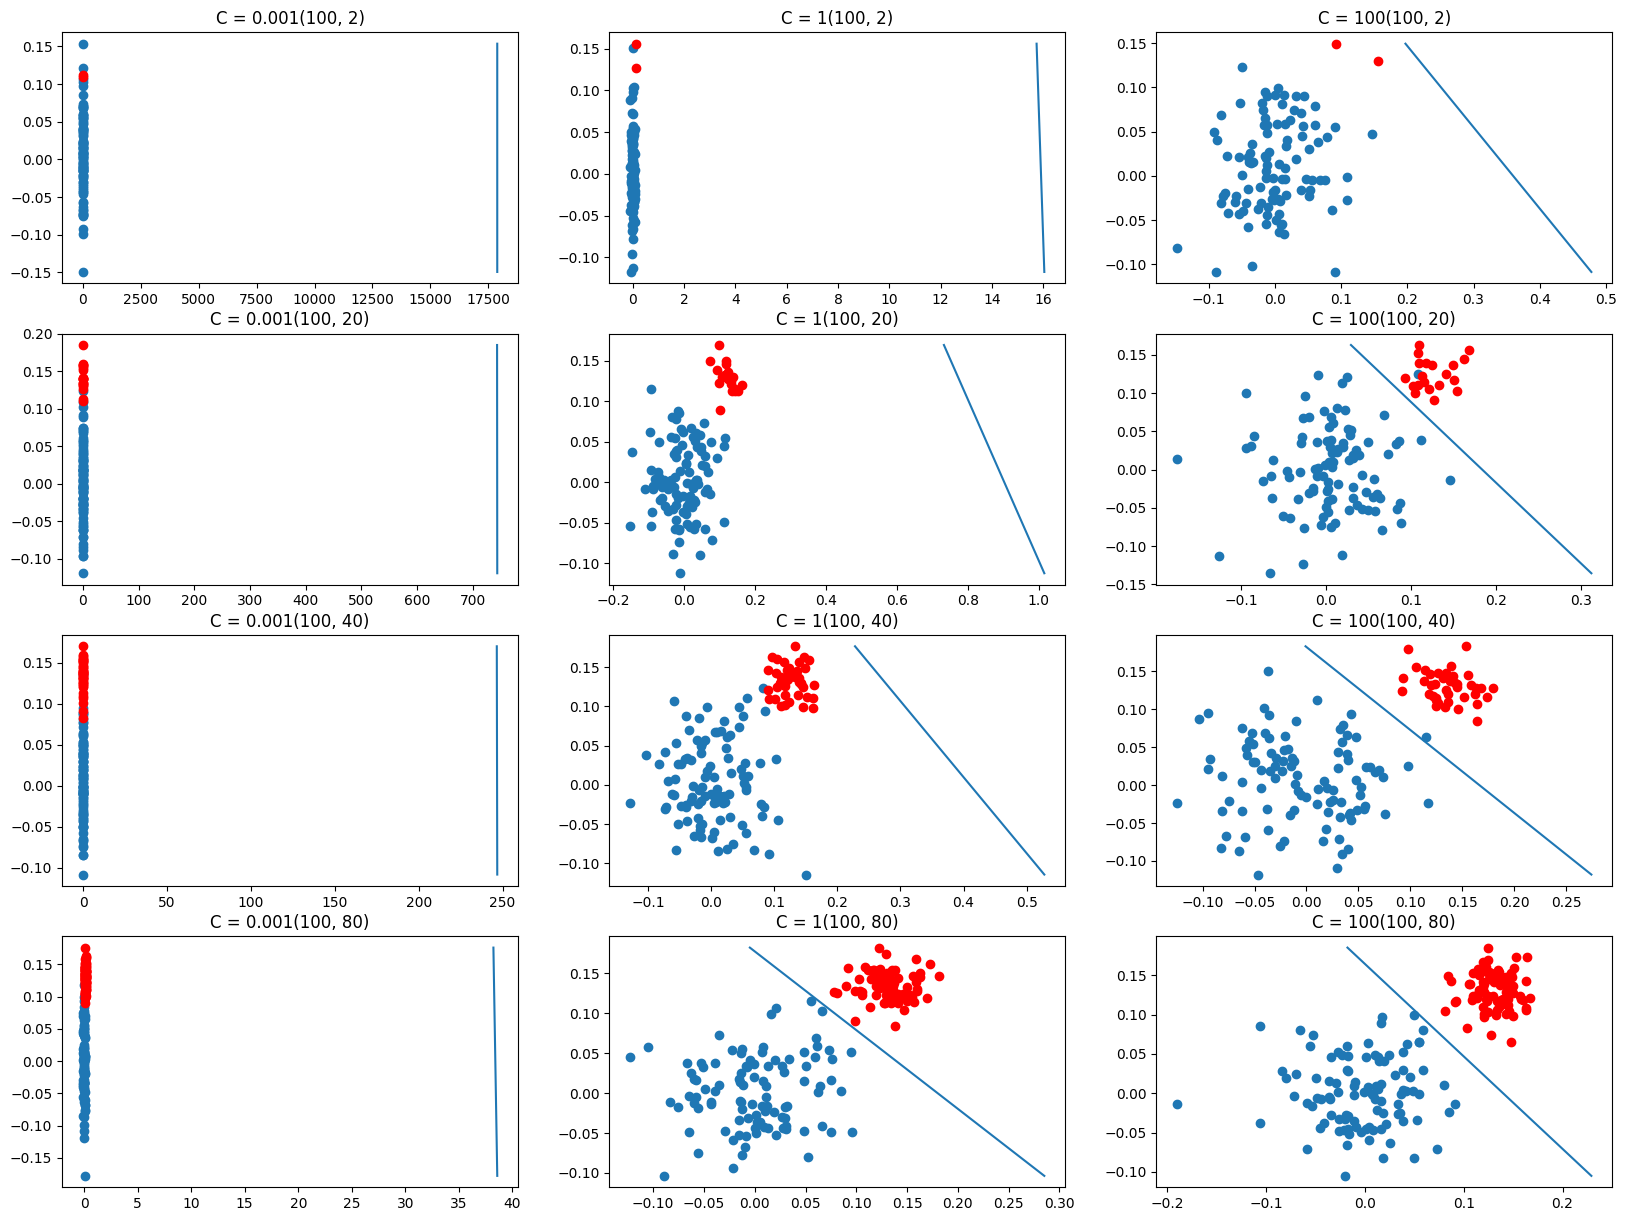

In [47]:
plt.figure(figsize=(20,15))

# initializing number of subplots to one(number of subplots will increment in the for loop till 12 subplots)
fig_count = 1

for i in ratios:
  # looping through the list of regularizers(indices) i.e. looping through 0.001,1,100

  for k in range(0,3):

    # C is regularizer which is (1/λ). C can be called as inverse of regularization strength(L2 regularization to be precise)
    clf = LogisticRegression(C=regularizers[k])

    plt.subplot(4, 3, fig_count)
    # incrementing the subplot count(till 12)
    fig_count += 1
    
    # generating random samples(postitve and negative) from normal(gaussian) distribution
    # positive random samples with mean = 0 and standard deviation = 0.05
    X_p=np.random.normal(0,0.05,size=(i[0],2)) 
    # negative random samples with mean = 0.13 and standard deviation = 0.02
    X_n=np.random.normal(0.13,0.02,size=(i[1],2)) 

    # reshape(-1,1) will give an array with only one column # reference - https://discuss.codingblocks.com/t/what-is-meaning-of-reshape-1-1/14830
    # array of ones(1)/positive labels equal to number of positive points
    y_p=np.array([1]*i[0]).reshape(-1,1) 
    # array of zeros(0)/negative labels equal to number of negative points
    y_n=np.array([0]*i[1]).reshape(-1,1)

    # vstack() stacks arrays vertically(row wise)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))

    #train the svm classifier
    clf.fit(X, y)

    # scatter() is used to plot dots in the plots for the data points of the dataset
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')

    # titles for every subplot(mentioning regularizer and dataset)
    plt.title('C = '+str(regularizers[k])+str(i))

    # function draw_line() called, to plot the hyperplane in every subplot
    draw_line(coef=clf.coef_[0], intercept=clf.intercept_[0], mi=min(X[:,1]), ma=max(X[:,1]))

plt.show()

### **Observation for Logistic Regression :**

1.   **When C = 0.001** <br>
As the regularization parameter(C) is very small(0.001), the hyperplane is unable to separate the positive points from negative points. The hyperplane observed is far away from the data points. The classifier fails to classify the points for balanced dataset as well as imbalanced dataset.
2.   **When C = 1** <br>
The hyperplane is unable to separate the positive and negative points of highly imbalanced dataset. But for dataset (100,80), the hyperplane is able to classify the points(positive and negative) with close to none misclassified points. 

1.   **When C = 100** <br>
The hyperplane is unable to classify the positive and negative points for (100,2) dataset. The classifier is somewhat successful to classify the positive and negative points for other datasets, with some misclassified points as well and close to none misclassified points for (100,80) dataset.

